Import Libraries

In [10]:
import pandas as pd
import numpy as np
import seaborn as sn
import imblearn
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
import matplotlib.pyplot as plt 
from tqdm import tqdm

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, mean_squared_error, auc, accuracy_score, confusion_matrix

from sklearn.preprocessing import OneHotEncoder as ohe
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, train_test_split

import xgboost as xgb
import lightgbm as lgb

Load past and new applications dataset

In [11]:
past = pd.read_csv('PastLoans.csv')
new = pd.read_csv('NewApplications_1_Round1.csv')
new_2 = pd.read_csv('NewApplications_1_Round2.csv')
profit_df = pd.read_csv('profit_12.csv')
past.set_index(['id'], inplace=True)
new.set_index(['id'], inplace=True)
new_2.set_index(['id'], inplace=True)
profit_df.set_index(['id'], inplace=True)

past.income = past.income.astype('int')
new.income = new.income.astype('int')
new_2.income = new_2.income.astype('int')


Data Manipulation for old dataset

In [12]:
past1 = past.drop(['digital2', 'digital3'], axis=1)
past1.rename(columns={'digital1':'digital'}, inplace=True)
y1 = list(past1['default'])
X1 = past1.drop(['default'], axis=1)

past2 = past.drop(['digital1', 'digital3'], axis=1)
past2.rename(columns={'digital2':'digital'}, inplace=True)
y2 = list(past2['default'])
X2 = past2.drop(['default'], axis=1)

past3 = past.drop(['digital1', 'digital2'], axis=1)
past3.rename(columns={'digital3':'digital'}, inplace=True)
y3 = list(past3['default'])
X3 = past3.drop(['default'], axis=1)


# Check numerical encoding on digital 1

<AxesSubplot:>

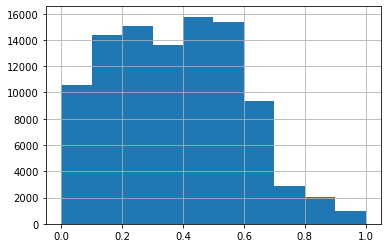

In [13]:
X1.digital.hist()

Data Manipulation for new dataset

In [14]:
new.rename(columns={'digital1':'digital'}, inplace=True)
new_2.rename(columns={'digital1':'digital'}, inplace=True)

Feature manipulation

In [15]:
cat_features = ['sex', 'employment']
pass_features = ['married']
numerical_features = ['income']
numerical_pass_features = ['digital']

cat_encoder = ohe()
numerical_encoder = StandardScaler()
# numerical_encoder = Normalizer()

In [16]:
# X1[numerical_features] = numerical_encoder.fit_transform(X1[numerical_features])
# X2[numerical_features] = numerical_encoder.fit_transform(X2[numerical_features])
# X3[numerical_features] = numerical_encoder.fit_transform(X3[numerical_features])

numerical_encoder.fit_transform(X1[numerical_features])

X1[numerical_features] = numerical_encoder.transform(X1[numerical_features])
X2[numerical_features] = numerical_encoder.transform(X2[numerical_features])
X3[numerical_features] = numerical_encoder.transform(X3[numerical_features])

# ll_list = list(X1.income)
# mini = min(ll_list)
# maxi = max(ll_list)
# ll = [(l - mini)/(maxi-mini) for l in ll_list]

# X1.income = [(l - mini)/(maxi-mini) for l in ll_list]
# X2.income = [(l - mini)/(maxi-mini) for l in ll_list]
# X3.income = [(l - mini)/(maxi-mini) for l in ll_list]
# normalized = (x-min(x))/(max(x)-min(x))

dums = pd.get_dummies(X1[cat_features], drop_first=True)
X1.drop(cat_features, axis=1, inplace=True)
X2.drop(cat_features, axis=1, inplace=True)
X3.drop(cat_features, axis=1, inplace=True)

X1[dums.columns] = dums
X2[dums.columns] = dums
X3[dums.columns] = dums

In [17]:
new[numerical_features] = numerical_encoder.transform(new[numerical_features])
new_2[numerical_features] = numerical_encoder.transform(new_2[numerical_features])

dums_new = pd.get_dummies(new[cat_features], drop_first=True)
new.drop(cat_features, axis=1, inplace=True)
new[dums_new.columns] = dums_new

dums_new_2 = pd.get_dummies(new_2[cat_features], drop_first=True)
new_2.drop(cat_features, axis=1, inplace=True)
new_2[dums_new_2.columns] = dums_new_2

In [18]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [ ]:
# oversample1 = SMOTE(sampling_strategy=0.44)
# oversample2 = SMOTE(sampling_strategy=0.44)
# oversample3 = SMOTE(sampling_strategy=0.44)

# Xo_1, yo_1 = oversample1.fit_resample(X_train1, y_train1)
# Xo_2, yo_2 = oversample2.fit_resample(X_train2, y_train2)
# Xo_3, yo_3 = oversample3.fit_resample(X_train3, y_train3)


In [ ]:
# cat1 = ohe().fit(X1[cat_features])
# cat2 = ohe().fit(X2[cat_features])
# cat3 = ohe().fit(X3[cat_features])

In [ ]:
# clf1 = LogisticRegression(random_state=42).fit(X_train1, y_train1)
# clf2 = LogisticRegression(random_state=42).fit(X_train2, y_train2)
# clf3 = LogisticRegression(random_state=42).fit(X_train3, y_train3)

In [ ]:
# clf1_o = LogisticRegression(random_state=42).fit(Xo_1, yo_1)
# clf2_o = LogisticRegression(random_state=42).fit(Xo_2, yo_2)
# clf3_o = LogisticRegression(random_state=42).fit(Xo_3, yo_3)

In [ ]:
# distributions = dict(C=uniform(loc=0, scale=4), penalty=['l2', 'l1'])
# rand_clf1 = RandomizedSearchCV(clf1, distributions, random_state=42)
# search = rand_clf1.fit(X_train1, y_train1)

In [ ]:
# cross_val_score(clf1, X_train1, y_train1, scoring='f1')

In [ ]:
# f1_score(y_test1, clf1.predict(X_test1), average='macro')

In [ ]:
# cross_val_score(clf1_o, Xo_1, yo_1, scoring='f1')

In [ ]:
# f1_score(y_test1, clf1_o.predict(X_test1), average='macro')

Test different models and sampling strategies

In [ ]:
f1_s_logisticregression = []
score_s_logisticregression = []
predicted_length_logisticregression = []
accuracy_logisticregression = []
# auc_s = []

lst_i = range(25, 70)
for i in lst_i:
    print('iteration ', i)
    k = i/100
    oversample1 = BorderlineSMOTE(sampling_strategy=k)
    Xo_1, yo_1 = oversample1.fit_resample(X_train1, y_train1)

    clf1_o = LogisticRegression(random_state=42).fit(Xo_1, yo_1)
    # clf1_o = RandomForestClassifier(random_state=42).fit(Xo_1, yo_1)
    # clf1_o = AdaBoostClassifier(random_state=42).fit(Xo_1, yo_1)
    # clf1_o = GradientBoostingClassifier(random_state=42).fit(Xo_1, yo_1)
    
    f1_s_logisticregression.append(f1_score(y_test1, clf1_o.predict(X_test1), average='macro'))
    # auc_s.append(auc(y_test1, clf1_o.predict(X_test1)))

    score_s_logisticregression.append(clf1_o.score(Xo_1, yo_1))
    predicted_length_logisticregression.append(clf1_o.predict(X_test1).sum())
    accuracy_logisticregression.append(accuracy_score(y_test1, clf1_o.predict(X_test1)))

plt.plot(lst_i, f1_s_logisticregression)
plt.plot(lst_i, score_s_logisticregression)
plt.plot(lst_i, accuracy_logisticregression)
# plt.plot(lst_i, predicted_length)
plt.legend(['f1_score', 'Score', 'Accuracy'])
plt.title('Logistic Regression')

plt.show()

In [ ]:
f1_s_randomforest = []
score_s_randomforest = []
predicted_length_randomforest = []
accuracy_randomforest = []
# auc_s = []

lst_i = range(40, 50)
for i in lst_i:
    print('iteration ', i)
    k = i/100
    oversample1 = BorderlineSMOTE(sampling_strategy=k)
    Xo_1, yo_1 = oversample1.fit_resample(X_train1, y_train1)

    # clf1_o = LogisticRegression(random_state=42).fit(Xo_1, yo_1)
    clf1_o = RandomForestClassifier(random_state=42).fit(Xo_1, yo_1)
    # clf1_o = AdaBoostClassifier(random_state=42).fit(Xo_1, yo_1)
    # clf1_o = GradientBoostingClassifier(random_state=42).fit(Xo_1, yo_1)
    
    f1_s_randomforest.append(f1_score(y_test1, clf1_o.predict(X_test1), average='macro'))
    # auc_s.append(auc(y_test1, clf1_o.predict(X_test1)))

    score_s_randomforest.append(clf1_o.score(Xo_1, yo_1))
    predicted_length_randomforest.append(clf1_o.predict(X_test1).sum())
    accuracy_randomforest.append(accuracy_score(y_test1, clf1_o.predict(X_test1)))

plt.plot(lst_i, f1_s_randomforest)
plt.plot(lst_i, score_s_randomforest)
plt.plot(lst_i, accuracy_randomforest)
# plt.plot(lst_i, predicted_length)
plt.legend(['f1_score', 'Score', 'Accuracy'])
plt.title('Random Forest')

plt.show()

In [ ]:
# plt.plot(lst_i, f1_s)
# plt.plot(lst_i, score_s)
# # plt.plot(lst_i, predicted_length)
# plt.legend(['f1_score', 'Accuracy'])

# plt.show()

In [ ]:
# plt.plot(lst_i, f1_s)
# plt.plot(lst_i, score_s)
# # plt.plot(lst_i, predicted_length)
# plt.legend(['f1_score', 'Accuracy'])
# plt.title('Random Forest')

# plt.show()

In [ ]:
f1_s_ada = []
score_s_ada = []
predicted_length_ada = []
accuracy_ada = []
# auc_s_ada = []

lst_i = range(40, 50)
for i in lst_i:
    print('iteration ', i)
    k = i/100
    oversample1 = BorderlineSMOTE(sampling_strategy=k)
    Xo_1, yo_1 = oversample1.fit_resample(X_train1, y_train1)

    # clf1_o = LogisticRegression(random_state=42).fit(Xo_1, yo_1)
    # clf1_o = RandomForestClassifier(random_state=42).fit(Xo_1, yo_1)
    clf1_o = AdaBoostClassifier(random_state=42).fit(Xo_1, yo_1)
    # clf1_o = GradientBoostingClassifier(random_state=42).fit(Xo_1, yo_1)
    
    f1_s_ada.append(f1_score(y_test1, clf1_o.predict(X_test1), average='macro'))
    # auc_s_ada.append(auc(y_test1, clf1_o.predict(X_test1)))

    score_s_ada.append(clf1_o.score(Xo_1, yo_1))
    predicted_length_ada.append(clf1_o.predict(X_test1).sum())
    accuracy_ada.append(accuracy_score(y_test1, clf1_o.predict(X_test1)))

plt.plot(lst_i, f1_s_ada)
plt.plot(lst_i, score_s_ada)
plt.plot(lst_i, accuracy_ada)
# plt.plot(lst_i, predicted_length)
plt.legend(['f1_score', 'Score', 'Accuracy'])
plt.title('Ada Boost')

plt.show()

In [ ]:
f1_s_gradboost = []
score_s_gradboost = []
predicted_length_gradboost = []
accuracy_gradboost = []
# auc_s_gradboost = []

lst_i = range(40, 50)
for i in lst_i:
    print('iteration ', i)
    k = i/100
    oversample1 = BorderlineSMOTE(sampling_strategy=k)
    Xo_1, yo_1 = oversample1.fit_resample(X_train1, y_train1)

    # clf1_o = LogisticRegression(random_state=42).fit(Xo_1, yo_1)
    # clf1_o = RandomForestClassifier(random_state=42).fit(Xo_1, yo_1)
    # clf1_o = AdaBoostClassifier(random_state=42).fit(Xo_1, yo_1)
    clf1_o = GradientBoostingClassifier(random_state=42).fit(Xo_1, yo_1)
    
    f1_s_gradboost.append(f1_score(y_test1, clf1_o.predict(X_test1), average='macro'))
    # auc_s_gradboost.append(auc(y_test1, clf1_o.predict(X_test1)))

    score_s_gradboost.append(clf1_o.score(Xo_1, yo_1))
    predicted_length_gradboost.append(clf1_o.predict(X_test1).sum())
    accuracy_gradboost.append(accuracy_score(y_test1, clf1_o.predict(X_test1)))

plt.plot(lst_i, f1_s_gradboost)
plt.plot(lst_i, score_s_gradboost)
plt.plot(lst_i, accuracy_gradboost)
# plt.plot(lst_i, predicted_length)
plt.legend(['f1_score', 'Score', 'Accuracy'])
plt.title('Gradient Boosting')

plt.show()

In [ ]:
f1_s_gxboost = []
score_s_gxboost = []
predicted_length_gxboost = []
accuracy_xgboost = []
# auc_s_gxboost = []

lst_i = range(40, 50)
for i in lst_i:
    print('iteration ', i)
    k = i/100
    oversample1 = BorderlineSMOTE(sampling_strategy=k)
    Xo_1, yo_1 = oversample1.fit_resample(X_train1, y_train1)

    clf1_o = xgb.XGBClassifier(random_state=42).fit(Xo_1, yo_1)
    
    f1_s_gxboost.append(f1_score(y_test1, clf1_o.predict(X_test1), average='macro'))
    # auc_s_gxboost.append(auc(y_test1, clf1_o.predict(X_test1)))

    score_s_gxboost.append(clf1_o.score(Xo_1, yo_1))
    predicted_length_gxboost.append(clf1_o.predict(X_test1).sum())
    accuracy_xgboost.append(accuracy_score(y_test1, clf1_o.predict(X_test1)))

plt.plot(lst_i, f1_s_gxboost)
plt.plot(lst_i, score_s_gxboost)
plt.plot(lst_i, accuracy_xgboost)
# plt.plot(lst_i, predicted_length)
plt.legend(['f1_score', 'Score', 'Accuracy'])
plt.title('XGBoost')

plt.show()

In [ ]:
f1_s_lgb = []
score_s_lgb = []
predicted_length_lgb = []
accuracy_lgb = []
# auc_s_lgb = []

lst_i = range(40, 50)
for i in lst_i:
    print('iteration ', i)
    k = i/100
    oversample1 = BorderlineSMOTE(sampling_strategy=k)
    Xo_1, yo_1 = oversample1.fit_resample(X_train1, y_train1)

    clf1_o = lgb.LGBMClassifier(random_state=42).fit(Xo_1, yo_1)
    
    f1_s_lgb.append(f1_score(y_test1, clf1_o.predict(X_test1), average='macro'))
    # auc_s_gxboost.append(auc(y_test1, clf1_o.predict(X_test1)))

    score_s_lgb.append(clf1_o.score(Xo_1, yo_1))
    predicted_length_lgb.append(clf1_o.predict(X_test1).sum())
    accuracy_lgb.append(accuracy_score(y_test1, clf1_o.predict(X_test1)))

plt.plot(lst_i, f1_s_lgb)
plt.plot(lst_i, score_s_lgb)
plt.plot(lst_i, accuracy_lgb)
# plt.plot(lst_i, predicted_length_lgb)
plt.legend(['f1_score', 'Score', 'Accuracy'])
plt.title('LGBM')

plt.show()

Test different models on best sampling strategy

In [ ]:
f1_score_predlength_accuracy_xgb = []
f1_score_predlength_accuracy_lgb = []
f1_score_predlength_accuracy_logistic = []
f1_score_predlength_accuracy_randomforest = []
f1_score_predlength_accuracy_adaboost = []
f1_score_predlength_accuracy_gradientboost = []

lst_res = [f1_score_predlength_accuracy_xgb, f1_score_predlength_accuracy_lgb, 
            f1_score_predlength_accuracy_logistic, f1_score_predlength_accuracy_randomforest,
            f1_score_predlength_accuracy_adaboost, f1_score_predlength_accuracy_gradientboost]

clfs = [#xgb.XGBClassifier(random_state=42),
        lgb.LGBMClassifier(random_state=42)#,
        # LogisticRegression(random_state=42),
        # RandomForestClassifier(random_state=42),
        # AdaBoostClassifier(random_state=42),
        # GradientBoostingClassifier(random_state=42)
        ]

i = 0

for c in clfs:
    print('iteration ', c)
    oversample1 = BorderlineSMOTE(sampling_strategy=0.44)
    Xo_1, yo_1 = oversample1.fit_resample(X_train1, y_train1)

    clf1_o = c.fit(Xo_1, yo_1)
    
    lst_res[i].append(f1_score(y_test1, clf1_o.predict(X_test1), average='macro'))
    lst_res[i].append(accuracy_score(y_test1, clf1_o.predict(X_test1)))
    tn, fp, fn, tp = confusion_matrix(y_test1, clf1_o.predict(X_test1)).ravel()
    specificity = tn / (tn+fp)
    sensitivity = tp / (tp+fn)
    lst_res[i].append(sensitivity)
    lst_res[i].append(specificity)
    probas = clf1_o.predict_proba(X_test1)

    # auc_s_gxboost.append(auc(y_test1, clf1_o.predict(X_test1)))

    # lst_res[i].append(clf1_o.score(Xo_1, yo_1))
    lst_res[i].append(clf1_o.predict(X_test1).sum())

    i += 1

# plt.plot(lst_i, f1_s_lgb)
# plt.plot(lst_i, score_s_lgb)
# plt.plot(lst_i, accuracy_lgb)
# # plt.plot(lst_i, predicted_length_lgb)
# plt.legend(['f1_score', 'Score', 'Accuracy'])
# plt.title('LGBM')

# plt.show()

In [ ]:
# probas1 = [x[1] for x in probas]
# min(probas1)
# clf1_o.predict(X_test1)

#### Final

Oversample and create model, fit, and collect statestics

In [199]:
f1_score_predlength_accuracy_final = []

lst_res = f1_score_predlength_accuracy_final

clfs_f = lgb.LGBMClassifier(colsample_bytree = 0.8548563182713019, min_child_samples= 108, min_child_weight = 1e-05, num_leaves = 25, 
                                reg_alpha = 5, reg_lambda = 0.1, scale_pos_weight = 2, subsample= 0.6707185279896568)
oversample1 = BorderlineSMOTE(sampling_strategy=0.44)
Xo_1, yo_1 = oversample1.fit_resample(X_train1, y_train1)

clf1_o = clfs_f.fit(Xo_1, yo_1)

lst_res.append(f1_score(y_test1, clf1_o.predict(X_test1), average='macro'))
lst_res.append(accuracy_score(y_test1, clf1_o.predict(X_test1)))
tn, fp, fn, tp = confusion_matrix(y_test1, clf1_o.predict(X_test1)).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
lst_res.append(sensitivity)
lst_res.append(specificity)
probas = clf1_o.predict_proba(X_test1)

# auc_s_gxboost.append(auc(y_test1, clf1_o.predict(X_test1)))

# lst_res.append(clf1_o.score(Xo_1, yo_1))
lst_res.append(clf1_o.predict(X_test1).sum())

Hyperparameter Tuning

In [194]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform


In [197]:
# f1_score_predlength_accuracy_final = []

# lst_res = f1_score_predlength_accuracy_final

fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'auc', 
            "eval_set" : [(X_test1, y_test1)],
            'eval_names': ['valid'],
            'verbose': 100}

param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100],
             'scale_pos_weight':[1,2,6,12]}


n_HP_points_to_test = 100

#n_estimators is set to a "large value". 
# The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
clfs_f = lgb.LGBMClassifier(max_depth=-1, random_state=314, silent=False, metric='None', n_jobs=-1, n_estimators=5000)

gs = RandomizedSearchCV(
    estimator = clfs_f,
    param_distributions = param_test, 
    n_iter = n_HP_points_to_test,
    scoring = 'balanced_accuracy',
    cv = 3,
    refit = False,
    random_state = 314,
    verbose = 2)

gs.fit(Xo_1, yo_1, **fit_params)
print('Best score reached: {} with params: {} '.format(gs.best_score_, gs.best_params_))



# clf1_o = clfs_f.fit(Xo_1, yo_1)

# lst_res.append(f1_score(y_test1, clf1_o.predict(X_test1), average='macro'))
# lst_res.append(accuracy_score(y_test1, clf1_o.predict(X_test1)))
# tn, fp, fn, tp = confusion_matrix(y_test1, clf1_o.predict(X_test1)).ravel()
# specificity = tn / (tn+fp)
# sensitivity = tp / (tp+fn)
# lst_res.append(sensitivity)
# lst_res.append(specificity)
# probas = clf1_o.predict_proba(X_test1)

# # auc_s_gxboost.append(auc(y_test1, clf1_o.predict(X_test1)))

# # lst_res.append(clf1_o.score(Xo_1, yo_1))
# lst_res.append(clf1_o.predict(X_test1).sum())

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[LightGBM] [Info] Number of positive: 19201, number of negative: 43640
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000663 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 520
[LightGBM] [Info] Number of data points in the train set: 62841, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.305549 -> initscore=-0.821012
[LightGBM] [Info] Start training from score -0.821012
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 30 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

In [200]:
probas1 = [x[1] for x in probas]
probas0 = [x[0] for x in probas]
# counts, bins = np.histogram(probas1)
# plt.hist(probas1)

In [201]:
res = pd.DataFrame(probas, columns=['proba_no_default', 'proba_default'])
res['default_pred'] = clf1_o.predict(X_test1)
res['default_true'] = y_test1
res['be_rate'] = res['proba_default']/(1-res['proba_default'])
res['profit'] = (1+res['be_rate'])*10000*(1-res['proba_default'])-10000

prob_different = res[res['default_true'] != res['default_pred']]
prob_default = prob_different[prob_different['default_true']==1].proba_default
prob_no_default = prob_different[prob_different['default_true']==0].proba_default


In [ ]:
# res.sort_values(by=['proba_default'], inplace=True)


In [202]:
# res['percentile'] = pd.qcut(res.proba_default, q=range(11), labels=(range(10)))
kk = 20
qq=[x/kk for x in range(kk+1)]
res['percentile'] = pd.qcut(res.proba_default, q=qq, labels=(range(kk)))
# res['percentile'] += 1
pd.DataFrame(res.groupby(by=['percentile', 'default_true', 'default_pred']).count())

proba_no_default  proba_default  \
percentile default_true default_pred                                    
0          0            0                          971            971   
                        1                            0              0   
           1            0                           30             30   
                        1                            0              0   
1          0            0                          935            935   
...                                                ...            ...   
18         1            1                          396            396   
19         0            0                            0              0   
                        1                          506            506   
           1            0                            0              0   
                        1                          493            493   

                                      be_rate  profit  
percentile default_true default_pred                   
0          0            0                 971     971  
                        1                   0       0  
           1            0                  30      30  
                        1                   0       0  
1          0            0                 935     935  
...                                       ...     ...  
18         1            1                 396     396  
19         0            0                   0       0  
                        1                 506     506  
           1            0                   0       0  
                        1                 493     493  

[80 rows x 4 columns]

In [203]:
list_sens = []
list_spec = []
list_accu = []
list_tp = []
list_tn = []
list_fp = []
list_fn = []
list_default_perc = []
for pp in tqdm(range(kk)):
    mod_res = res[res['percentile']==(pp)].copy()
    tp = mod_res[(mod_res['default_pred']==0) & (mod_res['default_true']==0)].shape[0]
    tn = mod_res[(mod_res['default_pred']==1) & (mod_res['default_true']==1)].shape[0]
    fp = mod_res[(mod_res['default_pred']==0) & (mod_res['default_true']==1)].shape[0]
    fn = mod_res[(mod_res['default_pred']==1) & (mod_res['default_true']==0)].shape[0]
    list_sens.append(tp / (tp+fn))
    list_spec.append(tn / (tn+fp))
    list_accu.append((tn+tp) / (tp+tn+fp+fn))
    list_default_perc.append((tn+fp)/(tn+tp+fn+fp))
    list_tp.append(tp)
    list_tn.append(tn)
    list_fp.append(fp)
    list_fn.append(fn)

# df_perc = pd.DataFrame(list_sens, list_spec, list_accu, columns=['sensitivity', 'specificity', 'accuracy'])
df_perc = pd.DataFrame(list_sens, columns=['sensitivity'])
df_perc['specificity'] = list_spec
df_perc['accuracy'] =  list_accu
df_perc['real_default_percentage'] = list_default_perc
df_perc['tp'] =  list_tp
df_perc['tn'] =  list_tn
df_perc['fp'] =  list_fp
df_perc['fn'] =  list_fn
df_perc['be_rate_new'] = (df_perc['real_default_percentage'])/(1-df_perc['real_default_percentage'])


df_perc


100%|██████████| 20/20 [00:00<00:00, 386.05it/s]


,sensitivity,specificity,accuracy,real_default_percentage,tp,tn,fp,fn,be_rate_new
0,1.000000,0.000000,0.970030,0.029970,971,0,30,0,0.030896
1,1.000000,0.000000,0.935000,0.065000,935,0,65,0,0.069519
2,1.000000,0.000000,0.912913,0.087087,912,0,87,0,0.095395
3,1.000000,0.000000,0.909000,0.091000,909,0,91,0,0.100110
4,1.000000,0.000000,0.900000,0.100000,900,0,100,0,0.111111
5,1.000000,0.000000,0.894000,0.106000,894,0,106,0,0.118568
6,1.000000,0.000000,0.894000,0.106000,894,0,106,0,0.118568
7,1.000000,0.000000,0.888112,0.111888,889,0,112,0,0.125984
8,1.000000,0.000000,0.855578,0.144422,859,0,145,0,0.168801
9,1.000000,0.000000,0.869347,0.130653,865,0,130,0,0.150289


In [204]:
res_f = res.join(df_perc, on='percentile', how='left')
res_f

,proba_no_default,proba_default,default_pred,default_true,be_rate,profit,percentile,sensitivity,specificity,accuracy,real_default_percentage,tp,tn,fp,fn,be_rate_new
0,0.774610,0.225390,0,0,0.290972,0.000000e+00,3,1.0,0.0,0.909000,0.091000,909,0,91,0,0.100110
1,0.805289,0.194711,0,0,0.241790,0.000000e+00,2,1.0,0.0,0.912913,0.087087,912,0,87,0,0.095395
2,0.723673,0.276327,0,0,0.381840,0.000000e+00,4,1.0,0.0,0.900000,0.100000,900,0,100,0,0.111111
3,0.472089,0.527911,1,0,1.118245,0.000000e+00,13,0.0,1.0,0.173000,0.173000,0,173,0,827,0.209190
4,0.352702,0.647298,1,0,1.835258,0.000000e+00,17,0.0,1.0,0.277277,0.277277,0,277,0,722,0.383657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.950648,0.049352,0,0,0.051914,1.818989e-12,0,1.0,0.0,0.970030,0.029970,971,0,30,0,0.030896
19996,0.528824,0.471176,0,0,0.890989,0.000000e+00,11,1.0,0.0,0.843844,0.156156,843,0,156,0,0.185053
19997,0.766606,0.233394,0,0,0.304451,0.000000e+00,3,1.0,0.0,0.909000,0.091000,909,0,91,0,0.100110
19998,0.868271,0.131729,0,0,0.151714,0.000000e+00,1,1.0,0.0,0.935000,0.065000,935,0,65,0,0.069519


Predict new dataset

In [205]:
profit_df['new_default_pred'] = clf1_o.predict(new)
probas_new = clf1_o.predict_proba(new)
profit_df['new_proba_default'] =  [x[1] for x in probas_new]
profit_df['percentile'] = pd.qcut(profit_df.new_proba_default, q=qq, labels=(range(kk)))
profit_df

,own,competing2,competing3,borrowertype,accepted,default,profit,new_default_pred,new_proba_default,percentile
id,,,,,,,,,,
100001,0.178253,NaN,0.174741,3,0,0,NaN,0,0.354000,7
100002,0.155131,0.469120,0.093990,1,0,0,NaN,0,0.396143,9
100003,0.148830,0.099437,0.099718,3,0,0,NaN,0,0.172959,2
100004,0.173515,0.418875,0.218949,3,1,0,1735.152,0,0.361365,7
100005,0.157499,0.514527,0.145152,1,1,0,1574.986,0,0.408165,9
...,...,...,...,...,...,...,...,...,...,...
199996,0.235013,NaN,0.557271,3,1,0,2350.134,0,0.397242,9
199997,0.879730,0.417800,0.751792,3,0,1,NaN,1,0.819314,19
199998,0.542129,0.951939,NaN,3,1,1,-10000.000,1,0.675214,17


In [206]:
df_perc

,sensitivity,specificity,accuracy,real_default_percentage,tp,tn,fp,fn,be_rate_new
0,1.000000,0.000000,0.970030,0.029970,971,0,30,0,0.030896
1,1.000000,0.000000,0.935000,0.065000,935,0,65,0,0.069519
2,1.000000,0.000000,0.912913,0.087087,912,0,87,0,0.095395
3,1.000000,0.000000,0.909000,0.091000,909,0,91,0,0.100110
4,1.000000,0.000000,0.900000,0.100000,900,0,100,0,0.111111
5,1.000000,0.000000,0.894000,0.106000,894,0,106,0,0.118568
6,1.000000,0.000000,0.894000,0.106000,894,0,106,0,0.118568
7,1.000000,0.000000,0.888112,0.111888,889,0,112,0,0.125984
8,1.000000,0.000000,0.855578,0.144422,859,0,145,0,0.168801
9,1.000000,0.000000,0.869347,0.130653,865,0,130,0,0.150289


In [207]:
profit_old_final = profit_df.join(df_perc[['real_default_percentage', 'be_rate_new']], on='percentile', how='left')
profit_old_final

,own,competing2,competing3,borrowertype,accepted,default,profit,new_default_pred,new_proba_default,percentile,real_default_percentage,be_rate_new
id,,,,,,,,,,,,
100001,0.178253,NaN,0.174741,3,0,0,NaN,0,0.354000,7,0.111888,0.125984
100002,0.155131,0.469120,0.093990,1,0,0,NaN,0,0.396143,9,0.130653,0.150289
100003,0.148830,0.099437,0.099718,3,0,0,NaN,0,0.172959,2,0.087087,0.095395
100004,0.173515,0.418875,0.218949,3,1,0,1735.152,0,0.361365,7,0.111888,0.125984
100005,0.157499,0.514527,0.145152,1,1,0,1574.986,0,0.408165,9,0.130653,0.150289
...,...,...,...,...,...,...,...,...,...,...,...,...
199996,0.235013,NaN,0.557271,3,1,0,2350.134,0,0.397242,9,0.130653,0.150289
199997,0.879730,0.417800,0.751792,3,0,1,NaN,1,0.819314,19,0.493493,0.974308
199998,0.542129,0.951939,NaN,3,1,1,-10000.000,1,0.675214,17,0.277277,0.383657


In [208]:
profit_old_final = profit_df.join(df_perc[['real_default_percentage', 'be_rate_new']], on='percentile', how='left')
profit_old_final['salah_rate'] = profit_old_final['new_proba_default']/(1-profit_old_final['new_proba_default'])
profit_old_final['adj_own'] = profit_old_final['own'] - ((profit_old_final['borrowertype']==1).astype('int'))*0.02
profit_old_final['adj_2'] = profit_old_final['competing2'] - ((profit_old_final['borrowertype']==2).astype('int'))*0.02
profit_old_final['adj_3'] = profit_old_final['competing3'] - ((profit_old_final['borrowertype']==3).astype('int'))*0.02
profit_old_final['to_use_rate'] = profit_old_final['be_rate_new'] + 0.3

profit_old_final.loc[profit_old_final['to_use_rate']>1, 'to_use_rate'] = 1

profit_old_final['adj_to_use'] = profit_old_final['to_use_rate'] - ((profit_old_final['borrowertype']==1).astype('int'))*0.02
profit_old_final.loc[profit_old_final['percentile']>16, 'adj_to_use'] = np.nan
profit_old_final['profit_own'] = (-10000 + 10000*(1+profit_old_final['to_use_rate'])*(1-(profit_old_final['default'].astype('int'))))*((profit_old_final[['adj_to_use', 'adj_2', 'adj_3']].min(axis = 1)==profit_old_final['adj_to_use']).astype('int'))
profit_old_final['profit_2'] = (-10000 + 10000*(1+profit_old_final['competing2'])*(1-(profit_old_final['default'].astype('int'))))*((profit_old_final[['adj_to_use', 'adj_2', 'adj_3']].min(axis = 1)==profit_old_final['adj_2']).astype('int'))
profit_old_final['profit_3'] = (-10000 + 10000*(1+profit_old_final['competing3'])*(1-(profit_old_final['default'].astype('int'))))*((profit_old_final[['adj_to_use', 'adj_2', 'adj_2']].min(axis = 1)==profit_old_final['adj_3']).astype('int'))

profit_old_final[['profit_own', 'profit_2', 'profit_3']].sum() #1.5

profit_own    9.918210e+06
profit_2     -7.124828e+06
profit_3      0.000000e+00
dtype: float64

In [216]:
profit_old_final.columns

Index(['own', 'competing2', 'competing3', 'borrowertype', 'accepted',
       'default', 'profit', 'new_default_pred', 'new_proba_default',
       'percentile', 'real_default_percentage', 'be_rate_new', 'salah_rate',
       'adj_own', 'adj_2', 'adj_3', 'to_use_rate', 'adj_to_use', 'profit_own',
       'profit_2', 'profit_3', 'profit_own_old', 'profit_2_old',
       'profit_3_old'],
      dtype='object')

In [160]:
sum(profit_old_final['profit_own'])

9964508.063935032

In [212]:
klist_o = []
klist_2 = []
klist_3 = []

klist_o_old = []
klist_2_old = []
klist_3_old = []

for k in tqdm(range(100)):
    kq = k/100
    profit_old_final = profit_df.join(df_perc[['real_default_percentage', 'be_rate_new']], on='percentile', how='left')
    profit_old_final['salah_rate'] = profit_old_final['new_proba_default']/(1-profit_old_final['new_proba_default'])
    profit_old_final['adj_own'] = profit_old_final['own'] - ((profit_old_final['borrowertype']==1).astype('int'))*0.02
    profit_old_final['adj_2'] = profit_old_final['competing2'] - ((profit_old_final['borrowertype']==2).astype('int'))*0.02
    profit_old_final['adj_3'] = profit_old_final['competing3'] - ((profit_old_final['borrowertype']==3).astype('int'))*0.02
    profit_old_final['to_use_rate'] = profit_old_final['be_rate_new'] + kq

    profit_old_final.loc[profit_old_final['to_use_rate']>1, 'to_use_rate'] = 1

    profit_old_final['adj_to_use'] = profit_old_final['to_use_rate'] - ((profit_old_final['borrowertype']==1).astype('int'))*0.02
    profit_old_final.loc[profit_old_final['percentile']>16, 'adj_to_use'] = np.nan
    # profit_old_final.loc[profit_old_final['percentile']>16, 'to_use_rate'] = np.nan

    profit_old_final['profit_own'] = (-10000 + 10000*(1+profit_old_final['to_use_rate'])*(1-(profit_old_final['default'].astype('int'))))*((profit_old_final[['adj_to_use', 'adj_2', 'adj_3']].min(axis = 1)==profit_old_final['adj_to_use']).astype('int'))
    profit_old_final['profit_2'] = (-10000 + 10000*(1+profit_old_final['competing2'])*(1-(profit_old_final['default'].astype('int'))))*((profit_old_final[['adj_to_use', 'adj_2', 'adj_3']].min(axis = 1)==profit_old_final['adj_2']).astype('int'))
    profit_old_final['profit_3'] = (-10000 + 10000*(1+profit_old_final['competing3'])*(1-(profit_old_final['default'].astype('int'))))*((profit_old_final[['adj_to_use', 'adj_2', 'adj_2']].min(axis = 1)==profit_old_final['adj_3']).astype('int'))

    profit_old_final['profit_own_old'] = (-10000 + 10000*(1+profit_old_final['own'])*(1-(profit_old_final['default'].astype('int'))))*((profit_old_final[['adj_own', 'adj_2', 'adj_3']].min(axis = 1)==profit_old_final['adj_own']).astype('int'))
    profit_old_final['profit_2_old'] = (-10000 + 10000*(1+profit_old_final['competing2'])*(1-(profit_old_final['default'].astype('int'))))*((profit_old_final[['adj_own', 'adj_2', 'adj_3']].min(axis = 1)==profit_old_final['adj_2']).astype('int'))
    profit_old_final['profit_3_old'] = (-10000 + 10000*(1+profit_old_final['competing3'])*(1-(profit_old_final['default'].astype('int'))))*((profit_old_final[['adj_own', 'adj_2', 'adj_2']].min(axis = 1)==profit_old_final['adj_3']).astype('int'))

    klist_o.append(sum(profit_old_final['profit_own']))
    klist_2.append(sum(profit_old_final['profit_2']))
    klist_3.append(sum(profit_old_final['profit_3']))

    klist_o_old.append(sum(profit_old_final['profit_own_old']))
    klist_2_old.append(sum(profit_old_final['profit_2_old']))
    klist_3_old.append(sum(profit_old_final['profit_3_old']))

    # profit_old_final[['profit_own', 'profit_2', 'profit_3']].sum() #1.5
    # profit_old_final[['profit_own_old', 'profit_2_old', 'profit_3_old']].sum() #1.5


100%|██████████| 100/100 [00:07<00:00, 13.27it/s]


In [190]:
profit_old_final[['profit_own', 'profit_2', 'profit_3']].sum() #1.5


profit_own    6610000.000
profit_2     -1816764.204
profit_3            0.000
dtype: float64

In [192]:
profit_old_final[['profit_own_old', 'profit_2_old', 'profit_3_old']].sum() #1.5


profit_own_old   -7.383778e+06
profit_2_old     -1.258426e+07
profit_3_old     -5.000000e+04
dtype: float64

In [214]:
klist_o.index(max(klist_o))

30

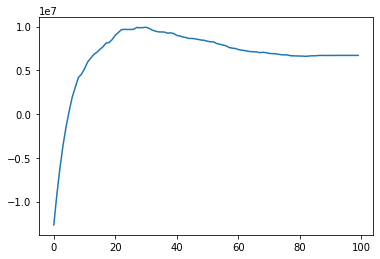

In [213]:
plt.plot(klist_o)

In [ ]:
klist_o = []
klist_2 = []
klist_3 = []

klist_o_old = []
klist_2_old = []
klist_3_old = []


for k in tqdm(range(100)):
    kq = k/100
    profit_old_final = profit_df.join(df_perc[['real_default_percentage', 'be_rate_new']], on='percentile', how='left')
    profit_old_final['salah_rate'] = profit_old_final['new_proba_default']/(1-profit_old_final['new_proba_default'])
    profit_old_final['adj_own'] = profit_old_final['own'] - ((profit_old_final['borrowertype']==1).astype('int'))*0.02
    profit_old_final['adj_2'] = profit_old_final['competing2'] - ((profit_old_final['borrowertype']==2).astype('int'))*0.02
    profit_old_final['adj_3'] = profit_old_final['competing3'] - ((profit_old_final['borrowertype']==3).astype('int'))*0.02
    profit_old_final['to_use_rate'] = profit_old_final['be_rate_new'] + kq

    profit_old_final.loc[profit_old_final['to_use_rate']>1, 'to_use_rate'] = 1

    profit_old_final['adj_to_use'] = profit_old_final['to_use_rate'] - ((profit_old_final['borrowertype']==1).astype('int'))*0.02
    profit_old_final.loc[profit_old_final['percentile']>16, 'adj_to_use'] = np.nan
    # profit_old_final.loc[profit_old_final['percentile']>16, 'to_use_rate'] = np.nan

    profit_old_final['profit_own'] = (-10000 + 10000*(1+profit_old_final['to_use_rate'])*(1-(profit_old_final['default'].astype('int'))))*((profit_old_final[['adj_to_use', 'adj_2', 'adj_3']].min(axis = 1)==profit_old_final['adj_to_use']).astype('int'))
    profit_old_final['profit_2'] = (-10000 + 10000*(1+profit_old_final['competing2'])*(1-(profit_old_final['default'].astype('int'))))*((profit_old_final[['adj_to_use', 'adj_2', 'adj_3']].min(axis = 1)==profit_old_final['adj_2']).astype('int'))
    profit_old_final['profit_3'] = (-10000 + 10000*(1+profit_old_final['competing3'])*(1-(profit_old_final['default'].astype('int'))))*((profit_old_final[['adj_to_use', 'adj_2', 'adj_2']].min(axis = 1)==profit_old_final['adj_3']).astype('int'))

    profit_old_final['profit_own_old'] = (-10000 + 10000*(1+profit_old_final['own'])*(1-(profit_old_final['default'].astype('int'))))*((profit_old_final[['adj_own', 'adj_2', 'adj_3']].min(axis = 1)==profit_old_final['adj_own']).astype('int'))
    profit_old_final['profit_2_old'] = (-10000 + 10000*(1+profit_old_final['competing2'])*(1-(profit_old_final['default'].astype('int'))))*((profit_old_final[['adj_own', 'adj_2', 'adj_3']].min(axis = 1)==profit_old_final['adj_2']).astype('int'))
    profit_old_final['profit_3_old'] = (-10000 + 10000*(1+profit_old_final['competing3'])*(1-(profit_old_final['default'].astype('int'))))*((profit_old_final[['adj_own', 'adj_2', 'adj_2']].min(axis = 1)==profit_old_final['adj_3']).astype('int'))

    klist_o.append(sum(profit_old_final['profit_own']))
    klist_2.append(sum(profit_old_final['profit_2']))
    klist_3.append(sum(profit_old_final['profit_3']))

    klist_o_old.append(sum(profit_old_final['profit_own_old']))
    klist_2_old.append(sum(profit_old_final['profit_2_old']))
    klist_3_old.append(sum(profit_old_final['profit_3_old']))

    # profit_old_final[['profit_own', 'profit_2', 'profit_3']].sum() #1.5
    # profit_old_final[['profit_own_old', 'profit_2_old', 'profit_3_old']].sum() #1.5


In [158]:
profit_old_final[['profit_own', 'profit_2', 'profit_3']].sum() 

profit_own    6610000.000
profit_2     -1816764.204
profit_3            0.000
dtype: float64

In [163]:
klist_o.index(max(klist_o))

30

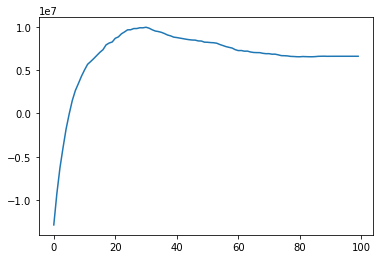

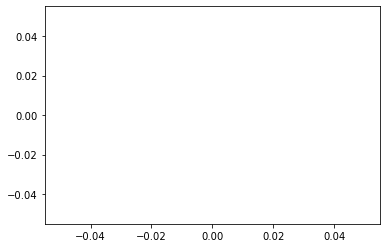

In [155]:
plt.plot(klist_2)


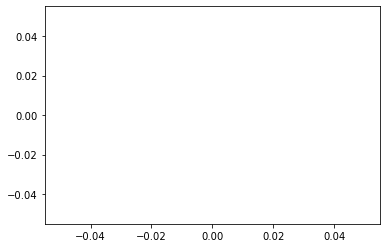

In [156]:
plt.plot(klist_3)

In [162]:
profit_old_final.to_csv('to_test.csv')

In [140]:
profit_old_final[['adj_own', 'adj_2', 'adj_3']].min(axis = 1)==profit_old_final['adj_own']

id
100001    False
100002    False
100003    False
100004     True
100005     True
          ...  
199996     True
199997    False
199998     True
199999     True
200000    False
Length: 100000, dtype: bool

In [99]:
profit_old_final

,own,competing2,competing3,borrowertype,accepted,default,profit,new_default_pred,new_proba_default,percentile,...,be_rate_new,salah_rate,adj_own,adj_2,adj_3,to_use_rate,adj_to_use,profit_own,profit_2,profit_3
id,,,,,,,,,,,,,,,,,,,,,
100001,0.178253,NaN,0.174741,3,0,0,NaN,0,0.218207,7,...,0.125701,0.279111,0.178253,NaN,0.154741,0.144701,0.144701,1447.014590,NaN,0.0
100002,0.155131,0.469120,0.093990,1,0,0,NaN,0,0.220584,7,...,0.125701,0.283012,0.135131,0.469120,0.093990,0.144701,0.124701,0.000000,0.0,0.0
100003,0.148830,0.099437,0.099718,3,0,0,NaN,0,0.101667,2,...,0.105843,0.113173,0.148830,0.099437,0.079718,0.124843,0.124843,0.000000,0.0,0.0
100004,0.173515,0.418875,0.218949,3,1,0,1735.152,0,0.212829,7,...,0.125701,0.270372,0.173515,0.418875,0.198949,0.144701,0.144701,1447.014590,0.0,0.0
100005,0.157499,0.514527,0.145152,1,1,0,1574.986,0,0.229227,8,...,0.142039,0.297400,0.137499,0.514527,0.145152,0.161039,0.141039,1610.389462,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199996,0.235013,NaN,0.557271,3,1,0,2350.134,0,0.261932,9,...,0.186620,0.354889,0.235013,NaN,0.537271,0.205620,0.205620,2056.197183,NaN,0.0
199997,0.879730,0.417800,0.751792,3,0,1,NaN,1,0.691745,19,...,0.980198,2.244069,0.879730,0.417800,0.731792,0.999198,0.999198,-0.000000,-10000.0,-0.0
199998,0.542129,0.951939,NaN,3,1,1,-10000.000,1,0.511378,17,...,0.423898,1.046572,0.542129,0.951939,NaN,0.442898,0.442898,-10000.000000,-0.0,NaN


In [102]:
profit_old_final[['profit_own', 'profit_2', 'profit_3']].sum() #1.5

profit_own   -9.976174e+06
profit_2     -1.375489e+07
profit_3      0.000000e+00
dtype: float64

In [59]:
profit_old_final['profit_own'].sum() #2

69138772.32461518

In [62]:
profit_old_final['profit_own'].sum() #3

67135196.49479729

71014830.31013712

STHG LATER

In [ ]:
res_f

In [ ]:
quartiles_vals = pd.DataFrame(range(10), columns=['quartile'])
quartiles_vals['quartile'] += 1
quartiles_vals['']


In [ ]:
res.nlargest(3,'default_pred')

In [ ]:
10000*1.2*10000

In [ ]:
vals0 = list(res[res['default_true']==0].proba_default)

plt.hist(vals0, bins=25)

In [ ]:
vals1 = list(res[res['default_true']==1].proba_default)
plt.hist(vals1, bins=25)

In [ ]:
counts, bins = np.histogram(prob_default)
plt.hist(prob_default, bins=25)

In [ ]:
counts, bins = np.histogram(prob_no_default)
plt.hist(prob_no_default, bins=25)

TPOT

In [ ]:
tpot = TPOTClassifier()
tpot.fit(X_train, y_train)
tpot.score(X_test, y_test)

In [ ]:
import tpot 


tpot = TPOTClassifier()
tpot.fit(X_train1, y_train1)
tpot.score(X_test1, y_test1)

# # let's try tpot
# # define evaluation procedure
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# # define search
# model = TPOTRegressor(generations=5, population_size=50, scoring='neg_mean_absolute_error', cv=cv, verbosity=2, random_state=1, n_jobs=-1)


In [ ]:
from tpot import TPOTClassifier
# from sklearn.datasets import load_digits
# from sklearn.model_selection import train_test_split
import sklearn.metrics
import timeit

# create train and test sets

tpot = TPOTClassifier(verbosity=3, 
                      scoring="f1_macro", 
                      random_state=42,
                      n_jobs=-1, 
                      generations=10, 
                      population_size=100)
# run three iterations and time them
for x in range(3):
    start_time = timeit.default_timer()
    tpot.fit(X_train1, y_train1)
    elapsed = timeit.default_timer() - start_time
    times.append(elapsed)
    winning_pipes.append(tpot.fitted_pipeline_)
    print('yo')
    scores.append(tpot.score(X_test1, y_test1))
    tpot.export('tpot_mnist_pipeline.py')
times = [time/60 for time in times]
print('Times:', times)
print('Scores:', scores)   
print('Winning pipelines:', winning_pipes)